## MNIST with FCNN

#### I start with the mnist fashion dataset from TensorFlow official website and modify it to mnist dataset.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score

## Import the MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist   #fashion_mnist modified to mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9.

In [3]:
class_names = ['0', '1' , '2', '3', '4', '5',
               '6', '7', '8', '9',]                 #dont need it but just want to add class names 

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [5]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [7]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [8]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

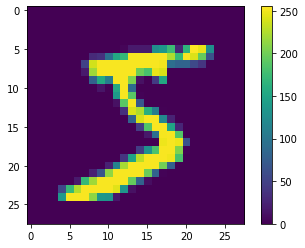

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

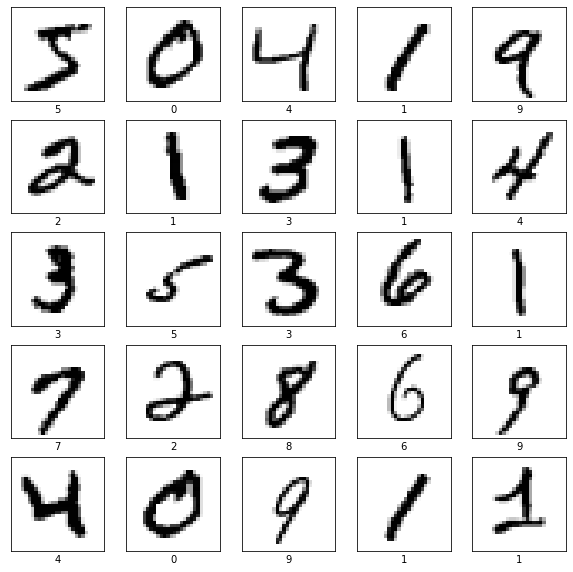

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

* The first layer flattess the 28x28 image to a 1D array (784 pixels).
* The second layer is a fully connected (dense) layer of 128 nodes/neurones.


#### Let's display the architecture of our model

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


* The first layer in this network (flatten_1), transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 
* Think of this layer as unstacking rows of pixels in the image and lining them up. 
* This layer has no parameters to learn; it only reformats the data.

 * After the pixels are flattened, the network consists of a sequence of two Dense layers. 
 * These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). 
 * The second (and last) layer returns a logits array with length of 10. 
 * Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* *Loss function* This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* This is how the model is updated based on the data it sees and its loss function.
* *Metrics* Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Train the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2575 - accuracy: 0.9266
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1092 - accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0739 - accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0546 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0423 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0327 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0272 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0224 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0174 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.015

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 99% on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0970 - accuracy: 0.9732

Test accuracy: 0.9732000231742859


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

### Make predictions 

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

predictions.shape

(10000, 10)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [19]:
predictions[0]

array([2.9445099e-11, 6.0094582e-11, 2.3824716e-08, 4.1128305e-06,
       4.2298931e-14, 9.1202192e-09, 1.9202670e-17, 9.9999571e-01,
       1.8578594e-10, 8.6086743e-08], dtype=float32)

A prediction is an array of 10 numbers. We can see which label has the highest confidence value: 7

In [20]:
np.argmax(predictions[0])

7

Examining the test label shows that this classification is correct:

In [21]:
test_labels[0]

7

Graph this to look at the full set of 10 class predictions.

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

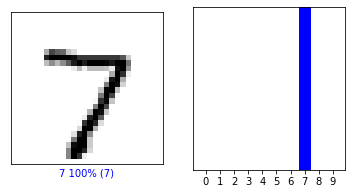

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

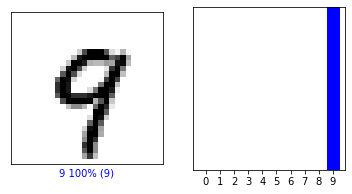

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

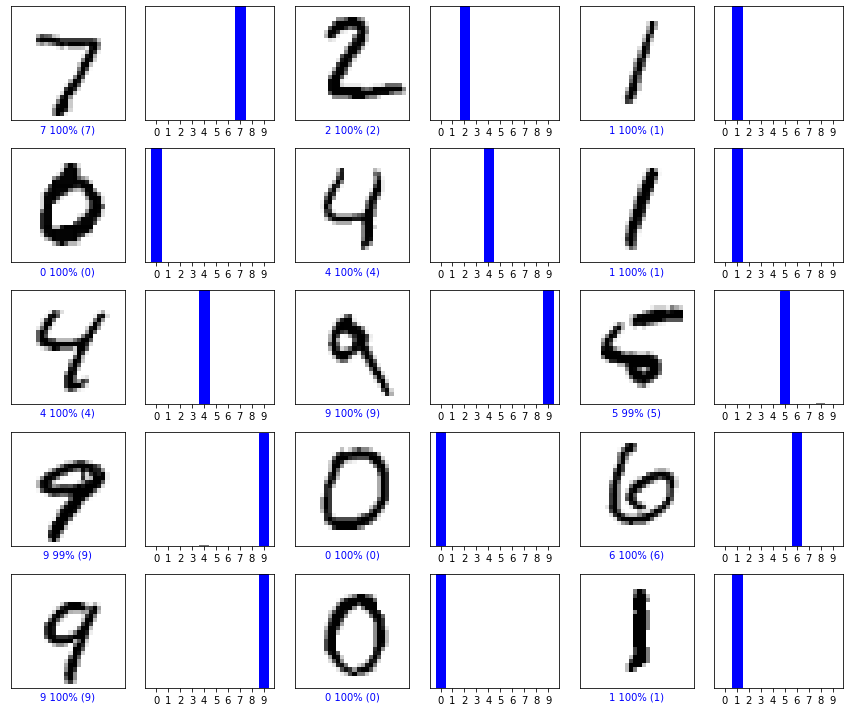

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.7134618e-13 6.1262675e-05 9.9993849e-01 2.2983626e-07 1.3901709e-20
  6.0028462e-08 4.5322419e-11 2.1959784e-16 4.0711194e-09 6.5953563e-18]]


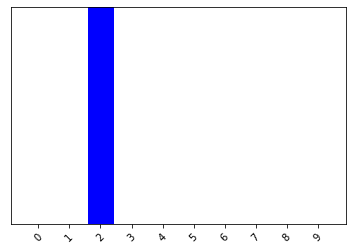

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [30]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

In [38]:
#y_pred = model.predict_classes(test_images)
#con_mat = tf.math.confusion_matrix(labels=true_label, predicted_label=y_pred).numpy()

y_pred = np.argmax(predictions, axis=1)
cnf_matrix = confusion_matrix(test_labels, y_pred)
print('Confusion Matrix\n', cnf_matrix)



'''# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, labels=class_names, normalize=True,
                      title='Normalized confusion matrix')'''

#plot_confusion_matrix(X = test_generator.classes, y_true = y_pred,labels= category_names, normalize=False)

Confusion Matrix
 [[ 971    0    0    3    0    3    0    1    1    1]
 [   0 1127    2    2    0    1    0    1    2    0]
 [   2    3  994   11    1    1    1   12    6    1]
 [   0    0    0  999    0    4    0    4    2    1]
 [   1    2    2    0  954    0    4    2    0   17]
 [   2    0    0    6    0  879    1    1    2    1]
 [  10    3    0    1    7   17  918    0    2    0]
 [   0    3    4    5    0    0    0 1012    1    3]
 [   5    2    3   25    6    8    1    7  914    3]
 [   2    3    0   12   12    8    0    7    1  964]]


"# Plot non-normalized confusion matrix\nplt.figure()\nplot_confusion_matrix(cnf_matrix, classes=class_names,\n                      title='Confusion matrix, without normalization')\n\n# Plot normalized confusion matrix\nplt.figure()\nplot_confusion_matrix(cnf_matrix, labels=class_names, normalize=True,\n                      title='Normalized confusion matrix')"

In [40]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score,precision_score


accuracy = round(accuracy_score(test_labels, y_pred)* 100, 2)
precision = precision_score(test_labels, y_pred,average='micro')

print('accuracy_mnist: %.3f' %accuracy)
print('precision_mnist: %.3f' %precision)

accuracy_mnist: 97.320
precision_mnist: 0.973
